In [ ]:
import requests
import pandas as pd
import json
import ast
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pprint import pprint


ImportError: cannot import name 'api_key' from 'config' (c:\Users\iffym\repos\5iveCoders\Project 1\config.py)

In [2]:
file_path="Resources/movies_metadata.csv"
movies_df=pd.read_csv(file_path)

cr_file_path="Resources\credit.csv"
credits_df=pd.read_csv(cr_file_path)

ratings_file_path="Resources/ratings.csv"
ratings_df=pd.read_csv(ratings_file_path)


<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\iffym\AppData\Local\Temp\ipykernel_1800\3735960652.py:4: SyntaxWarning: invalid escape sequence '\c'
  cr_file_path="Resources\credit.csv"
C:\Users\iffym\AppData\Local\Temp\ipykernel_1800\3735960652.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df=pd.read_csv(file_path)


In [3]:
#drop columns that are not needed

cleaned_movies_df= movies_df.drop(columns=["adult", "belongs_to_collection",
                "homepage","original_language",
                "overview","poster_path",
                "spoken_languages","title","tagline",
                "production_companies","production_countries",
                "video"])

#convert release date to datetime format
cleaned_movies_df["release_date"]=pd.to_datetime(cleaned_movies_df["release_date"], errors="coerce")
cleaned_movies_df["release_date"]=cleaned_movies_df["release_date"].dt.year

cleaned_movies_df=cleaned_movies_df.dropna() #drop rows with missing values
cleaned_movies_df=cleaned_movies_df.dropna(axis=1) #drop columns with missing values

#covert genres column from a list

cleaned_movies_df["genres"]=cleaned_movies_df["genres"].apply(lambda x:ast.literal_eval(x) if isinstance(x, str) else x)


In [4]:
# Fill NaN with empty lists
cleaned_movies_df["genres"] = cleaned_movies_df["genres"].apply(
    lambda x: x if isinstance(x, list) else []
)

cleaned_movies_df["genres"]=cleaned_movies_df["genres"].apply(lambda x: [i["name"] for i in x] if isinstance(x, list) else [])

cleaned_movies_df.head()


,budget,genres,id,imdb_id,original_title,popularity,release_date,revenue,runtime,status,vote_average,vote_count
0,30000000,"[Animation, Comedy, Family]",862,tt0114709,Toy Story,21.946943,1995.0,373554033.0,81.0,Released,7.7,5415.0
1,65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,Jumanji,17.015539,1995.0,262797249.0,104.0,Released,6.9,2413.0
2,0,"[Romance, Comedy]",15602,tt0113228,Grumpier Old Men,11.7129,1995.0,0.0,101.0,Released,6.5,92.0
3,16000000,"[Comedy, Drama, Romance]",31357,tt0114885,Waiting to Exhale,3.859495,1995.0,81452156.0,127.0,Released,6.1,34.0
4,0,[Comedy],11862,tt0113041,Father of the Bride Part II,8.387519,1995.0,76578911.0,106.0,Released,5.7,173.0


In [5]:
#filter movies released after 2015

last_decade_movies_df=cleaned_movies_df[(cleaned_movies_df["release_date"].notna()) & #removes NAN years/values
                                        (cleaned_movies_df["release_date"]>=2009) &
                                        (cleaned_movies_df["release_date"]<2020)] #filters movies released after 2010



# Flatten the 'genres' list and count occurrences
genre_counts = last_decade_movies_df['genres'].explode().value_counts()

# Create a DataFrame with the genre counts
genre_counts_df = pd.DataFrame(genre_counts).reset_index()
genre_counts_df.columns = ['genre', 'count']
genre_counts_df.head(20)


,genre,count
0,Drama,5854
1,Comedy,3970
2,Thriller,2703
3,Documentary,2087
4,Action,1856
5,Romance,1654
6,Horror,1554
7,Crime,1052
8,Science Fiction,920
9,Adventure,905


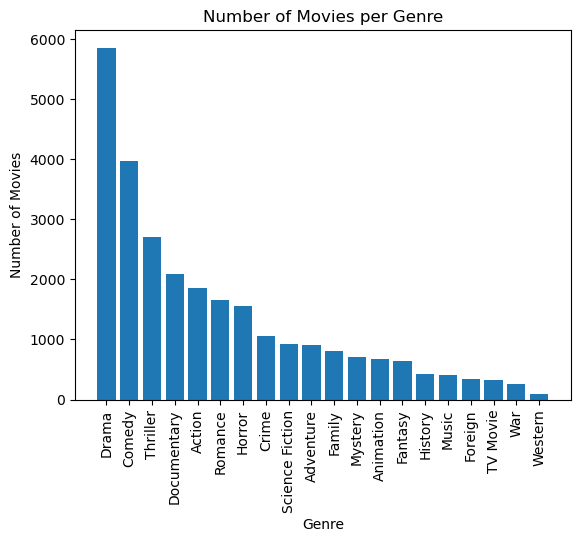

In [6]:
#number of movies per genre released over the years

plt.bar(genre_counts_df["genre"], genre_counts_df["count"])
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Number of Movies per Genre")
plt.xticks(rotation=90)
plt.show()


In [7]:
final_movies=cleaned_movies_df[['id','original_title','vote_average', 'runtime']]
final_movies.head(20)


,id,original_title,vote_average,runtime
0,862,Toy Story,7.7,81.0
1,8844,Jumanji,6.9,104.0
2,15602,Grumpier Old Men,6.5,101.0
3,31357,Waiting to Exhale,6.1,127.0
4,11862,Father of the Bride Part II,5.7,106.0
5,949,Heat,7.7,170.0
6,11860,Sabrina,6.2,127.0
7,45325,Tom and Huck,5.4,97.0
8,9091,Sudden Death,5.5,106.0
9,710,GoldenEye,6.6,130.0


In [8]:
#create a dataframe of the top 10 genres per year released

#explode the genres column which is in a list format to a row format
genre_explode=last_decade_movies_df.explode("genres")

#grouping by release date and genre to get the count of each genre per year
genre_explode=genre_explode.groupby(["release_date","genres"]).size().reset_index(name="count")

genre_explode=genre_explode.sort_values(by=["release_date","count"], ascending=[True,False])

#group by release date and get the top 10 genres per year
genre_explode=genre_explode.groupby("release_date").head(10)

#reset index
genre_explode=genre_explode.reset_index(drop=True)
genre_explode.head(20)


,release_date,genres,count
0,2009.0,Drama,694
1,2009.0,Comedy,468
2,2009.0,Thriller,345
3,2009.0,Action,242
4,2009.0,Documentary,218
5,2009.0,Romance,213
6,2009.0,Horror,184
7,2009.0,Adventure,127
8,2009.0,Crime,126
9,2009.0,Science Fiction,124


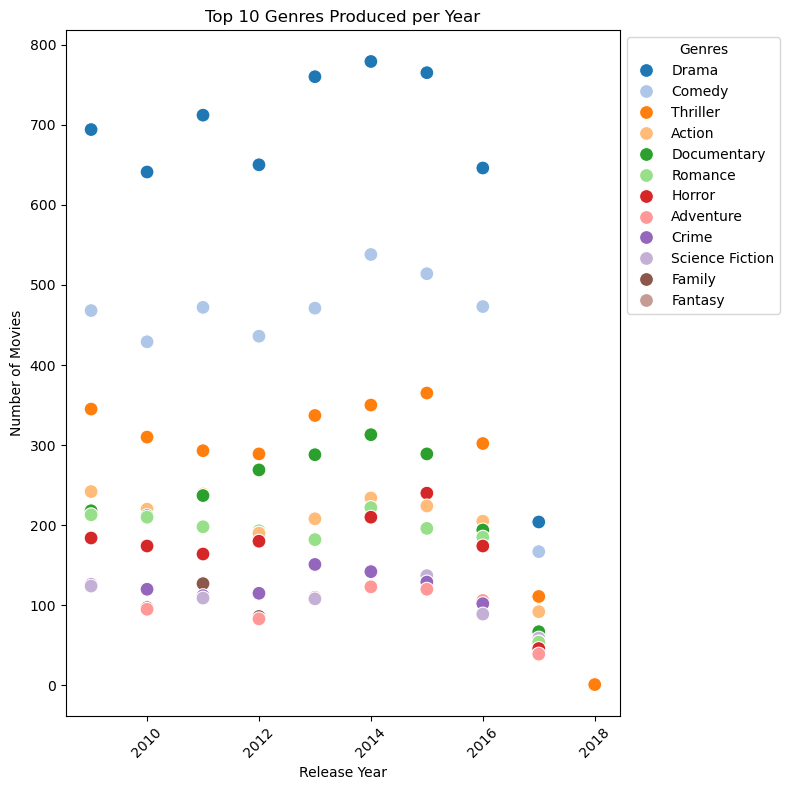

In [20]:
# Set the figure size
plt.figure(figsize=(8, 8))

# Create a scatter plot with Seaborn
sns.scatterplot(data=genre_explode, x="release_date", y="count", hue="genres", palette="tab20", s=100)

# Adding labels and title
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.title("Top 10 Genres Produced per Year")
plt.xticks(rotation=45)

# Display the legend
plt.legend(title="Genres", bbox_to_anchor=(1, 1), loc='upper left')

# Display the plot
plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()

In [14]:
# For each 'release_date', get the first (i.e., the genre with the lowest count)
lowest_genre_per_year = genre_explode.groupby("release_date").tail(1).reset_index(drop=True)

# Display the DataFrame
lowest_genre_per_year.head(10)


,release_date,genres,count
0,2009.0,Science Fiction,124
1,2010.0,Adventure,95
2,2011.0,Science Fiction,109
3,2012.0,Adventure,83
4,2013.0,Science Fiction,108
5,2014.0,Adventure,123
6,2015.0,Adventure,120
7,2016.0,Science Fiction,89
8,2017.0,Adventure,39
9,2018.0,Thriller,1


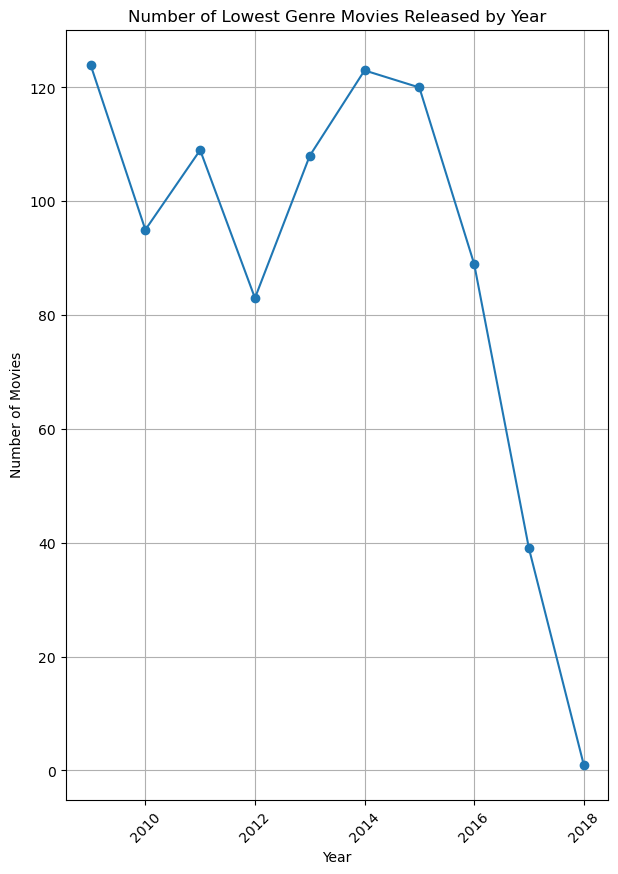

In [ ]:
plt.figure(figsize=(7, 10))
plt.plot(lowest_genre_per_year["release_date"], lowest_genre_per_year["count"], marker='o')
plt.title("Number of Lowest Genre Movies Released by Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.grid()
plt.show()





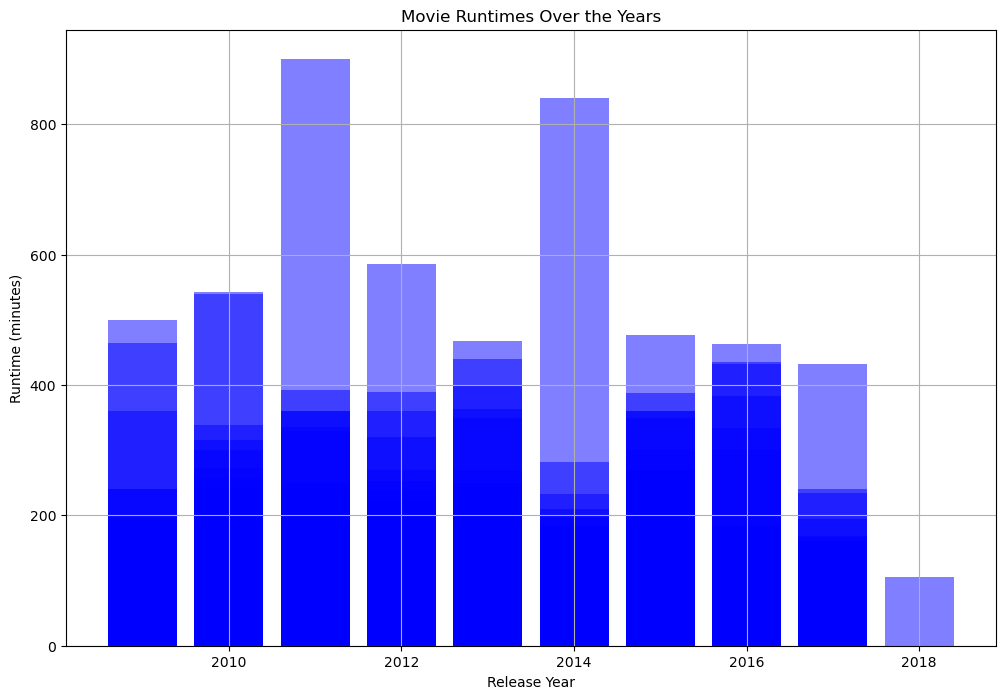

In [24]:

#Question_3_your_name - What is the trend of movie runtimes over the years (e.g., are movies getting longer or shorter)?
trend_movies_df=last_decade_movies_df[["release_date","runtime"]]
trend_movies_df

# Set the figure size
plt.figure(figsize=(12, 8))
plt.bar(trend_movies_df["release_date"], trend_movies_df["runtime"], color="blue", alpha=0.5)
plt.title("Movie Runtimes Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Runtime (minutes)")


plt.grid()
plt.show()

In [25]:
#Question_2_your_name - Which directors have the highest average IMDb ratings across their films?
#get the credits csv file
#Dropping Cast Column
clean_credits_df = credits_df.drop(columns = ["cast"])

#convert crew  from a list to rows
clean_credits_df["crew"]=clean_credits_df["crew"].apply(lambda x:ast.literal_eval(x) if isinstance(x, str) else x)

# Fill NaN with empty lists
clean_credits_df["crew"] = clean_credits_df["crew"].apply(lambda x: x if isinstance(x, list) else [])


clean_credits_df.head()


,crew,id
0,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
#extract the director from the crew column
def get_director(x):
    if isinstance(x,list):
        for i in x:
            if isinstance(i, dict)and i.get("job")=="Director":
                return i.get("name", "")
    return ""

#add director column to our original df
clean_credits_df["Director"]=clean_credits_df["crew"].apply(get_director)

# Check the results on a new dataframe to merge later
final_credits=clean_credits_df[["Director", "id"]]
final_credits.head()


,Director,id
0,John Lasseter,862
1,Joe Johnston,8844
2,Howard Deutch,15602
3,Forest Whitaker,31357
4,Charles Shyer,11862


In [27]:
#get data from our ratings.csv file
#rename movieId to id to merge dataframes

cleaned_rating_df = ratings_df.drop(columns=["userId", "timestamp"])
cleaned_rating_df.rename(columns={'movieId':"id"}, inplace=True)

cleaned_rating_df.head(10)


,id,rating
0,110,1.0
1,147,4.5
2,858,5.0
3,1221,5.0
4,1246,5.0
5,1968,4.0
6,2762,4.5
7,2918,5.0
8,2959,4.0
9,4226,4.0


In [50]:

final_movies=final_movies.copy()
final_movies['id'] = final_movies['id'].astype(int)

#merging director to movie ratings on id
merged_df=pd.merge(final_credits, cleaned_rating_df, on="id")
f_merged_df=pd.merge(merged_df, final_movies, on='id')
#f_merged_df

first_rating_df = f_merged_df.drop_duplicates(subset=['Director', 'id'], keep='first')
#first_rating_df_sorted = first_rating_df.sort_values(by='rating', ascending=False)

# Display the result
first_rating_df.head(15)


,Director,id,rating,original_title,vote_average,runtime
0,John Lasseter,862,3.0,Toy Story,7.7,81.0
374,Joe Johnston,8844,4.0,Jumanji,6.9,104.0
497,Michael Mann,949,4.0,Heat,7.7,170.0
2842,Martin Campbell,710,3.0,GoldenEye,6.6,130.0
4161,Renny Harlin,1408,5.0,Cutthroat Island,5.7,119.0
18049,Martin Scorsese,524,2.0,Casino,7.8,178.0
27212,Ang Lee,4584,4.0,Sense and Sensibility,7.2,136.0
27489,Allison Anders,5,3.0,Four Rooms,6.5,98.0
42747,Barry Sonnenfeld,8012,4.0,Get Shorty,6.4,105.0
43370,Jon Amiel,1710,3.0,Copycat,6.5,124.0


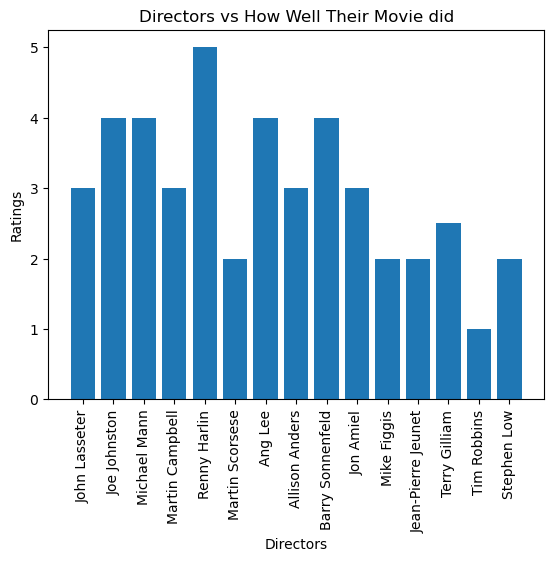

In [26]:
first_15_directors=first_rating_df.head(15)


plt.bar(first_15_directors["Director"], first_15_directors["rating"])
plt.xlabel("Directors")
plt.ylabel("Ratings")
plt.title("Directors vs How Well Their Movie did")
plt.xticks(rotation=90)
plt.tight_layout
plt.show()


In [29]:
#Final read data into CSV format
first_rating_df.to_csv('first_rating_directors.csv', index=False)


In [55]:
api_key= "&apikey=" + "99b7bf4e"
url="https://www.omdbapi.com/?t="

response=requests.get(url + first_rating_df.iloc[4,3] + api_key)
data=response.json()
pprint(data)



{'Actors': 'Geena Davis, Matthew Modine, Frank Langella',
 'Awards': '1 nomination total',
 'BoxOffice': '$10,017,322',
 'Country': 'France, Italy, Germany, United States',
 'DVD': 'N/A',
 'Director': 'Renny Harlin',
 'Genre': 'Action, Adventure, Comedy',
 'Language': 'English, Spanish, Latin, French',
 'Metascore': '37',
 'Plot': 'A female pirate and her companion race against their rivals to find '
         'a hidden island that contains a fabulous treasure.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BZTQ3OWY2NTctOTAyNS00MThjLTgyZjEtNzgzZGNiZDNhODUyXkEyXkFqcGc@._V1_SX300.jpg',
 'Production': 'N/A',
 'Rated': 'PG-13',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '5.7/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '40%'},
             {'Source': 'Metacritic', 'Value': '37/100'}],
 'Released': '22 Dec 1995',
 'Response': 'True',
 'Runtime': '124 min',
 'Title': 'Cutthroat Island',
 'Type': 'movie',
 'Website': 'N/A',
 'Writer': 'Michael Frost Beckner,

In [59]:
print(f'The Movie {data['Title']}, was released in {data["Released"]}, got {data['Awards']}  and had a Box Office total of: {data['BoxOffice']}')

The Movie Cutthroat Island, was released in 22 Dec 1995, got 1 nomination total  and had a Box Office total of: $10,017,322
